# 6. Fourierova transformácia
Fourierova transformácia (FT) je dôležitým nástrojom pri úprave signálov, ktoré rozkladá na
jednotlivé harmonické zložky. Hovoríme o prechode z časovej (rsp. priestorovej) oblasti do
frekvenčnej oblasti. Pre lepšie pochopenie uvedieme najskôr príklad použitia FT na signále šíriacom
sa pozdĺž jedného rozmeru zloženom z dvoch harmonických zložiek:

In [140]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
from skimage.color import rgb2gray
from skimage import data, exposure, transform,io,img_as_ubyte,morphology

In [141]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

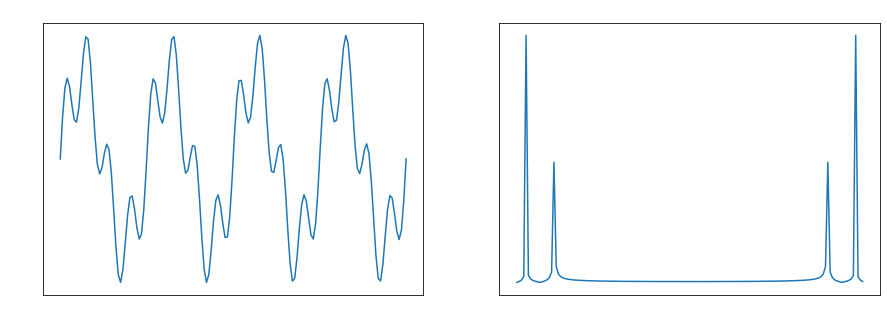

In [142]:
x = np.linspace(0, 8*np.pi, 150)
y_1 = 2*np.sin(x)
y_2 = np.sin(4*x)
y = y_1 + y_2

y_f = fft.fft(y)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Funkcia z dvoch sinusov s roznym f a A')
plt.subplot(122)
plt.title('Fourrier transform of the signal')
plt.plot(np.abs(y_f))

Úpravou frekvenčného spektra pred vykonaním inverznej Fourierovej transformácie môžeme zo
signálu odfiltrovať niektoré harmonické zložky:

C:\ProgramData\Anaconda3\envs\Computer_Vision\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'y')

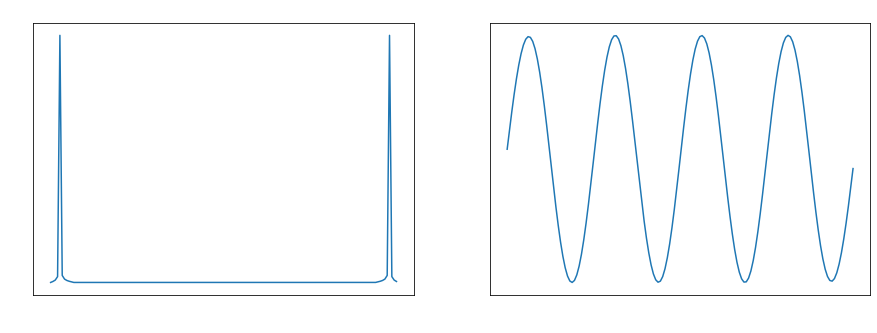

In [143]:
y_f_removed_f = y_f
y_f_removed_f[10:140] = 0  + 0.j
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(np.abs(y_f))
plt.title('Frekvencne spektrum s jednym odstranenym peakom')
plt.subplot(122)
y_t = fft.ifft(y_f)
plt.plot(x,y_t)
plt.xlabel('x')
plt.ylabel('y')


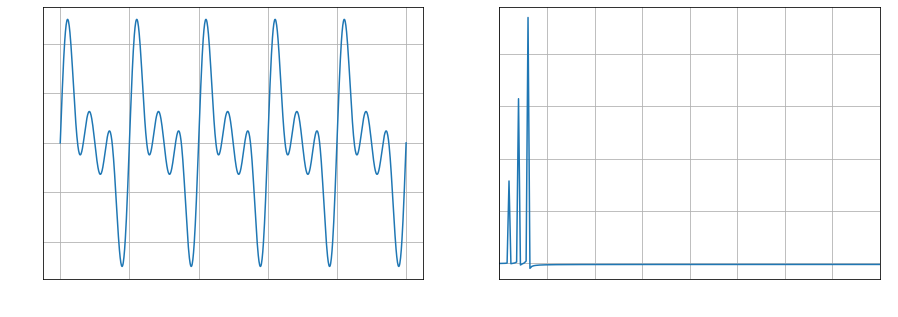

In [144]:
N = 1000
Fs  = 100 # Hz vzorkovacia frekvencia
T = N/Fs

x = np.linspace(0, 10*np.pi, N)

y_1 = np.sin(x) + np.sin(2*x) + np.sin(3*x)


f = np.linspace(0,N-1,N)*Fs/N


plt.figure(figsize=(15,5))
y_f = fft.fft(y_1)

plt.subplot(121)
plt.plot(y_1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.subplot(122)
plt.plot(f,np.real(y_f))
plt.axis([0,20,np.min(np.real(y_f))-1,np.max(np.real(y_f))+1])
plt.xlabel('Hz')
plt.ylabel('Y*Hz^-1')

plt.grid()

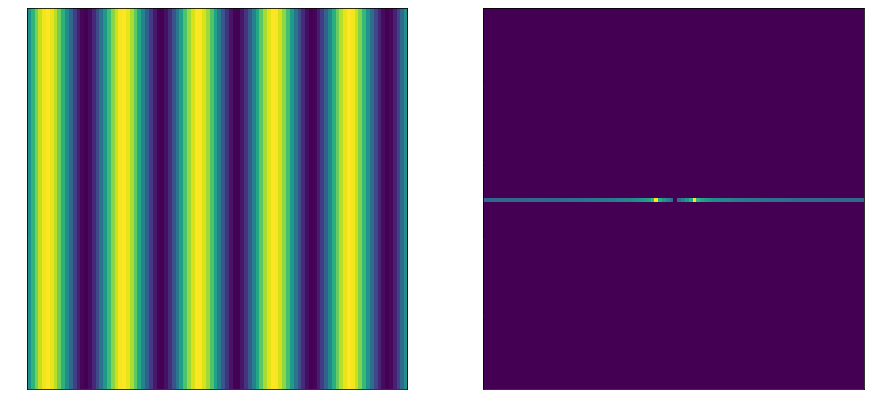

In [145]:
N=100
x = np.array([np.linspace(0,10*np.pi,N)])
y = np.sin(x)
im = np.repeat(y, 100,axis=0)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(im)
plt.subplot(122)
im_fft= fft.fft2(im)

zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

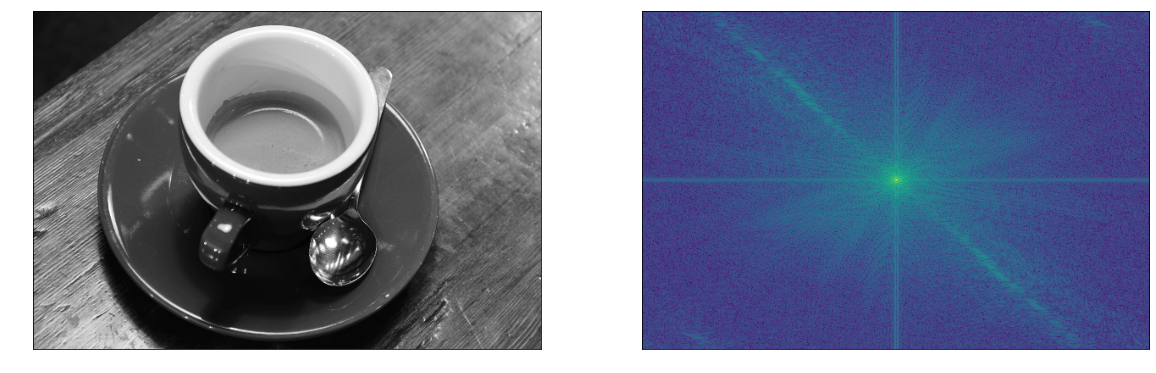

In [146]:
im = rgb2gray(data.coffee())
plt.figure(figsize=(20,15))
plt.subplot(121)
plt.imshow(im,cmap='gray')
plt.subplot(122)
im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(zero_center_im_fft)))

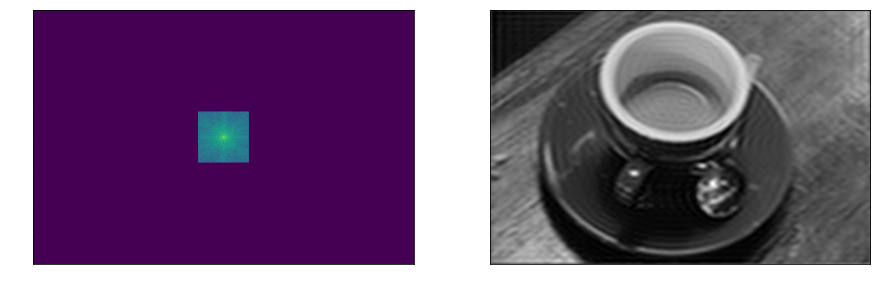

In [147]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = np.zeros(zero_center_im_fft.shape,dtype=np.complex)

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] =\
    zero_center_im_fft[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls]

plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

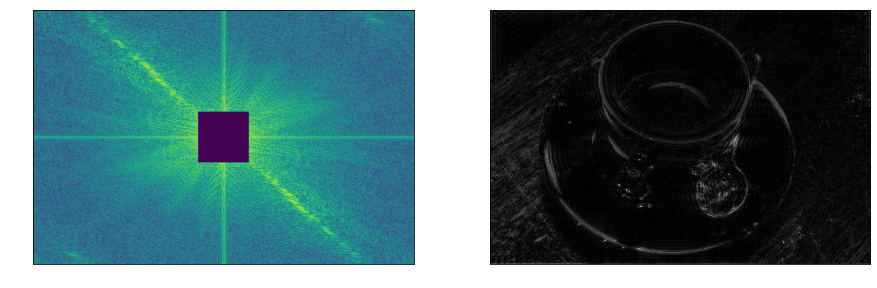

In [148]:
plt.figure(figsize=(15,10))
plt.subplot(121)
pxls = 40

im_fft= fft.fft2(im)
zero_center_im_fft = fft.fftshift(im_fft)
im_size = im.shape
filtered_spectrum = zero_center_im_fft

filtered_spectrum[im_size[0]//2-pxls:im_size[0]//2+pxls,im_size[1]//2-pxls:im_size[1]//2+pxls] = 0+0.j
plt.imshow(np.log(1+np.abs(filtered_spectrum)))
plt.subplot(122)
inverse_img = fft.ifft2(filtered_spectrum)
plt.imshow(np.abs(inverse_img), cmap='gray')

# Dokoncit cvicenie v knihe s obrazkami z knihy
# Dorobit bonusovu ulohu

Text(0.5, 1.0, 'Polohy hladaneho vzoru')

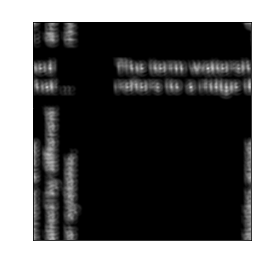

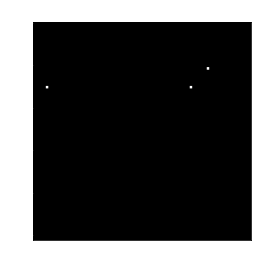

In [149]:
bw = plt.imread('imgs/text.png')
a = bw[33:44,88:98]

mask = np.zeros([256,256])
a = transform.rotate(a,180)

mask[33:44,88:98] = a
a = mask

C = fft.ifft2(fft.fft2(bw) * fft.fft2(a))
plt.imshow(np.abs(C),cmap="gray")
plt.title('Vysledok nasobenia vo frekvencnej oblasti')
plt.figure()

thresh = C > 60
SE = morphology.square(3)
thresh = morphology.binary_dilation(thresh, SE)
plt.imshow(thresh, cmap="gray")
plt.title("Polohy hladaneho vzoru")



<Figure size 432x288 with 0 Axes>

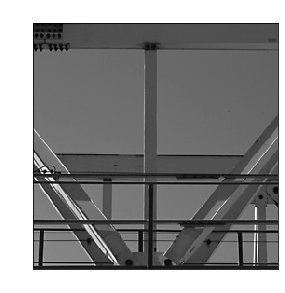

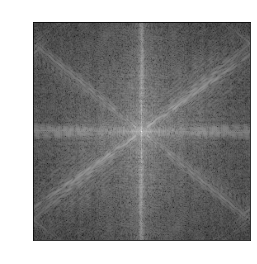

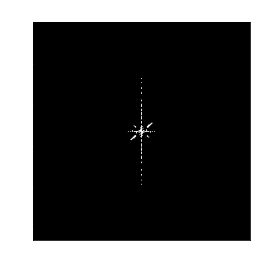

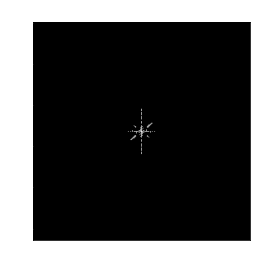

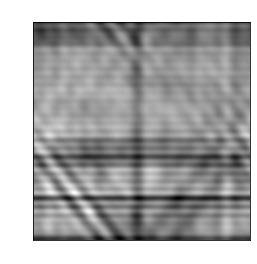

<Figure size 432x288 with 0 Axes>

In [150]:
Y = rgb2gray(io.imread('imgs/gantrycrane.png'))
Y = Y[:,69:332]  
io.imshow(Y,cmap="gray")
plt.title('Povodny obrazok')
plt.figure()

F = fft.fft2(Y)
F_shift = fft.fftshift(F)
F2 = np.log(np.abs(F_shift))

plt.imshow(F2,cmap="gray")
plt.title('Amplitudove spektrum')
plt.figure()

thresh = np.log(np.abs(F_shift)) > (0.55*np.max(np.max(np.log(np.abs(F_shift)))))
plt.imshow(thresh,cmap="gray")
plt.title('Amplitudove spektrum, prah')
plt.figure()

circ_filter = np.zeros(F.shape)
radius = 30
s1 = len(circ_filter[0])
s2 = len(circ_filter[1])

for i in range (0,s1):
    for j in range (0,s2):
        if np.sqrt(np.sum(([(i-s1/2),(j-s2/2)]))**2)<radius:
            circ_filter[i,j] = 1
            
F3 = F_shift * thresh * circ_filter
plt.imshow(np.log(0.1+np.abs(F3)),cmap="gray")
plt.title('Amplitudove spektrum, prahovane')
plt.figure()

Y = fft.ifft2(fft.ifftshift(F3))
plt.imshow(np.abs(Y),cmap="gray")
plt.title('Filtrovany obrazok')
plt.figure()

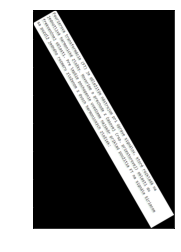

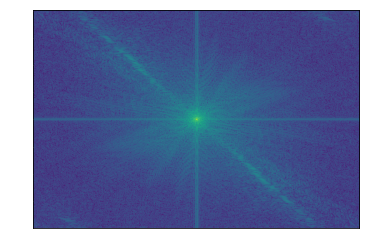

In [151]:
img = plt.imread("imgs/text_cv.png")
img = transform.rotate(img, -60, resize=True)
plt.imshow(img, cmap="gray")
plt.figure()
img_fft = fft.fft2(img)
img_fft2 = fft.fftshift(im_fft)
plt.imshow(np.log(1+np.abs(img_fft2)))